In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
%matplotlib inline 

In [2]:
batch_size=30
image_size=(128, 128)

# Набор данных для обучения

In [3]:
train_dataset = image_dataset_from_directory('./traning_set',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6243 files belonging to 208 classes.
Using 5619 files for training.


# Набор данных для валидации

In [4]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
validation_dataset = image_dataset_from_directory('./traning_set',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6243 files belonging to 208 classes.
Using 624 files for validation.


In [6]:
class_names = train_dataset.class_names



<function list.index(value, start=0, stop=9223372036854775807, /)>

In [7]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
import csv 

with open("class_names.csv", "w", newline='') as file:
    csv.writer(file).writerow(class_names)

# Набор данных для тестирования

In [9]:
test_dataset = image_dataset_from_directory('./test_set',
                                             seed=42, 
                                            batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")


Found 627 files belonging to 208 classes.


In [10]:
test_dataset.class_names

['AN21',
 'AN211',
 'AN22',
 'AN221',
 'AN222',
 'AN31',
 'AN311',
 'AN32',
 'AN321',
 'AN33',
 'AND2',
 'AND3',
 'AND4',
 'AND5',
 'AND6',
 'ANTENNACELL',
 'ANTENNACELLNP2',
 'AO21',
 'AO211',
 'AO22',
 'AO221',
 'AO222',
 'AO31',
 'AO311',
 'AO32',
 'AO321',
 'AO33',
 'BTH',
 'BTL',
 'BU',
 'CAG',
 'DFF',
 'DFFQ',
 'DFFR',
 'DFFRQ',
 'DFFRS',
 'DFFRSQ',
 'DFFS',
 'DFFSQ',
 'DFR',
 'DFR2',
 'DFR4',
 'DFR8',
 'DFRQ',
 'DFRQ2',
 'DFRQ4',
 'DFRQ8',
 'DFRR',
 'DFRR2',
 'DFRR4',
 'DFRR8',
 'DFRRQ',
 'DFRRQ2',
 'DFRRQ4',
 'DFRRQ8',
 'DFRRS',
 'DFRRSQ',
 'DFRS',
 'DFRSQ',
 'DLH',
 'DLHQ',
 'DLHR',
 'DLHRQ',
 'DLHRS',
 'DLHRSQ',
 'DLHRT',
 'DLHS',
 'DLHSQ',
 'DLHST',
 'DLHT',
 'DLL',
 'DLLQ',
 'DLLR',
 'DLLRQ',
 'DLLRS',
 'DLLRSQ',
 'DLLRT',
 'DLLRT2',
 'DLLRT4',
 'DLLRT8',
 'DLLS',
 'DLLSQ',
 'DLLST',
 'DLLT',
 'DLLT2',
 'DLLT4',
 'DLLT8',
 'EN2',
 'EN3',
 'EO2',
 'EO3',
 'FA',
 'FCNE',
 'FEED',
 'HA',
 'IN',
 'ITH',
 'ITL',
 'LGCN',
 'LGCP',
 'LOGIC0',
 'LOGIC1',
 'LSGCN',
 'LSGCP',
 'LSOGC

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Модель из интернета взята для сравнения

In [12]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 208 нейронов по количеству классов
model.add(Dense(208, activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 249s - loss: 5.7551 - accuracy: 0.0304 - val_loss: 4.0619 - val_accuracy: 0.0753 - 249s/epoch - 1s/step
Epoch 2/15
188/188 - 248s - loss: 2.2571 - accuracy: 0.3951 - val_loss: 0.6777 - val_accuracy: 0.7612 - 248s/epoch - 1s/step
Epoch 3/15
188/188 - 243s - loss: 0.4378 - accuracy: 0.8514 - val_loss: 0.2431 - val_accuracy: 0.9263 - 243s/epoch - 1s/step
Epoch 4/15
188/188 - 236s - loss: 0.1657 - accuracy: 0.9482 - val_loss: 0.1200 - val_accuracy: 0.9712 - 236s/epoch - 1s/step
Epoch 5/15
188/188 - 245s - loss: 0.0620 - accuracy: 0.9852 - val_loss: 0.0588 - val_accuracy: 0.9856 - 245s/epoch - 1s/step
Epoch 6/15
188/188 - 246s - loss: 0.1066 - accuracy: 0.9749 - val_loss: 0.0254 - val_accuracy: 0.9936 - 246s/epoch - 1s/step
Epoch 7/15
188/188 - 244s - loss: 0.0433 - accuracy: 0.9893 - val_loss: 0.0375 - val_accuracy: 0.9920 - 244s/epoch - 1s/step
Epoch 8/15
188/188 - 230s - loss: 0.0493 - accuracy: 0.9883 - val_loss: 0.0135 - val_accuracy: 0.9968 - 230s/epoch - 1s/step


In [15]:
scores = model.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 9s 328ms/step - loss: 0.0390 - accuracy: 0.9904


In [16]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.0431


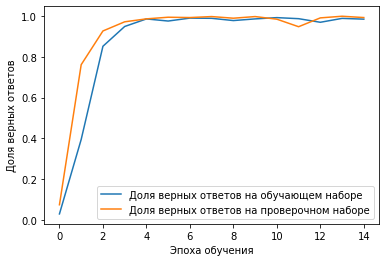

In [17]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

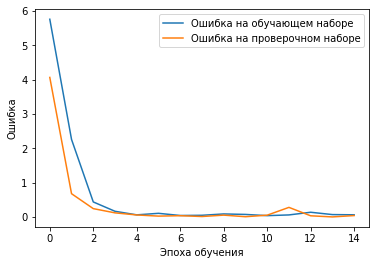

In [18]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.plot()
plt.show()

In [19]:
model.save("Symbol_Check_model_internet.h5")

# простейший вариант нейросети

In [20]:
# Создаем последовательную модель
model_simple = Sequential()
# Сверточный слой
model_simple.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_simple.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_simple.add(Flatten())
model_simple.add(Dense(256, activation='relu'))
# Выходной слой, 208 нейронов по количеству классов
model_simple.add(Dense(208, activation='softmax'))
model_simple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 208)               53456     
                                                                 
Total params: 16,831,344
Trainable params: 16,831,344
Non-trainable params: 0
__________________________________________

In [21]:
model_simple.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [22]:
history = model_simple.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 59s - loss: 155.3005 - accuracy: 0.4677 - val_loss: 0.8702 - val_accuracy: 0.7468 - 59s/epoch - 315ms/step
Epoch 2/15
188/188 - 60s - loss: 0.4568 - accuracy: 0.8779 - val_loss: 0.3557 - val_accuracy: 0.8926 - 60s/epoch - 317ms/step
Epoch 3/15
188/188 - 56s - loss: 0.1880 - accuracy: 0.9537 - val_loss: 0.2077 - val_accuracy: 0.9423 - 56s/epoch - 300ms/step
Epoch 4/15
188/188 - 57s - loss: 0.1022 - accuracy: 0.9767 - val_loss: 0.2010 - val_accuracy: 0.9471 - 57s/epoch - 303ms/step
Epoch 5/15
188/188 - 56s - loss: 0.0577 - accuracy: 0.9881 - val_loss: 0.1171 - val_accuracy: 0.9696 - 56s/epoch - 298ms/step
Epoch 6/15
188/188 - 56s - loss: 0.0625 - accuracy: 0.9890 - val_loss: 0.1757 - val_accuracy: 0.9631 - 56s/epoch - 300ms/step
Epoch 7/15
188/188 - 59s - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.0758 - val_accuracy: 0.9663 - 59s/epoch - 315ms/step
Epoch 8/15
188/188 - 71s - loss: 0.0292 - accuracy: 0.9947 - val_loss: 0.0527 - val_accuracy: 0.9856 - 71s/epoch - 3

In [23]:
scores = model_simple.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 2s 86ms/step - loss: 0.0440 - accuracy: 0.9888


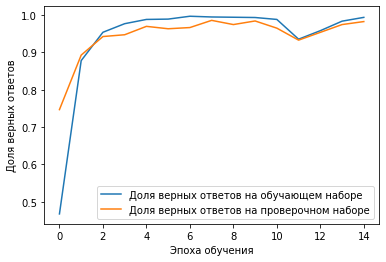

In [24]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

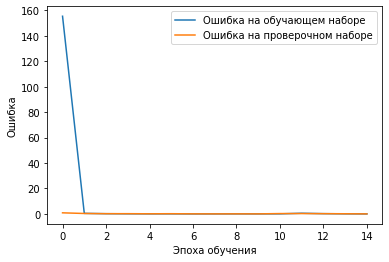

In [25]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [26]:
model.save("Symbol_Check_model_simple.h5")

# Увеличим количество фильтров до 32

In [27]:
# Создаем последовательную модель
model_s32 = Sequential()
# Сверточный слой
model_s32.add(Conv2D(32, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s32.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s32.add(Flatten())
model_s32.add(Dense(256, activation='relu'))
# Выходной слой, 208 нейронов по количеству классов
model_s32.add(Dense(208, activation='softmax'))
model_s32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_5 (Dense)             (None, 256)               33554688  
                                                                 
 dense_6 (Dense)             (None, 208)               53456     
                                                                 
Total params: 33,608,976
Trainable params: 33,608,976
Non-trainable params: 0
__________________________________________

In [28]:
model_s32.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [29]:
history = model_s32.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 97s - loss: 242.8113 - accuracy: 0.4013 - val_loss: 1.4705 - val_accuracy: 0.7067 - 97s/epoch - 515ms/step
Epoch 2/15
188/188 - 95s - loss: 0.8546 - accuracy: 0.8154 - val_loss: 0.6145 - val_accuracy: 0.8462 - 95s/epoch - 506ms/step
Epoch 3/15
188/188 - 93s - loss: 0.3359 - accuracy: 0.9283 - val_loss: 0.4061 - val_accuracy: 0.9375 - 93s/epoch - 492ms/step
Epoch 4/15
188/188 - 92s - loss: 0.1394 - accuracy: 0.9769 - val_loss: 0.1175 - val_accuracy: 0.9647 - 92s/epoch - 491ms/step
Epoch 5/15
188/188 - 92s - loss: 0.1074 - accuracy: 0.9826 - val_loss: 0.0600 - val_accuracy: 0.9840 - 92s/epoch - 490ms/step
Epoch 6/15
188/188 - 95s - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.0508 - val_accuracy: 0.9824 - 95s/epoch - 506ms/step
Epoch 7/15
188/188 - 98s - loss: 0.0254 - accuracy: 0.9970 - val_loss: 0.4169 - val_accuracy: 0.9712 - 98s/epoch - 522ms/step
Epoch 8/15
188/188 - 93s - loss: 0.0407 - accuracy: 0.9948 - val_loss: 0.0596 - val_accuracy: 0.9840 - 93s/epoch - 4

In [30]:
scores = model_s32.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 4s 164ms/step - loss: 0.0768 - accuracy: 0.9872


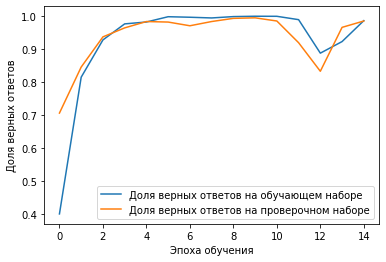

In [31]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


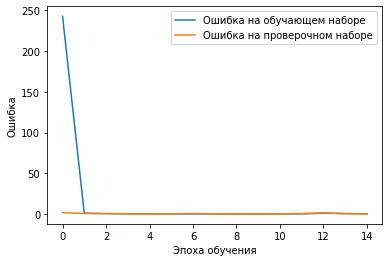

In [32]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [33]:
model.save("Symbol_Check_model_s32.h5")

 # добавляем еще один сверточный слой уменьшаем размер ядра на втором фильтре
 

In [34]:
# Создаем последовательную модель
model_s16_32 = Sequential()
# Сверточный слой
model_s16_32.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32.add(Flatten())
model_s16_32.add(Dense(512, activation='relu'))
# Выходной слой, 208 нейронов по количеству классов
model_s16_32.add(Dense(208, activation='softmax'))
model_s16_32.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_7 (Dense)             (None, 512)              

In [35]:
model_s16_32.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [36]:
history = model_s16_32.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 98s - loss: 47.4916 - accuracy: 0.5743 - val_loss: 0.3136 - val_accuracy: 0.9054 - 98s/epoch - 523ms/step
Epoch 2/15
188/188 - 97s - loss: 0.1766 - accuracy: 0.9500 - val_loss: 0.0696 - val_accuracy: 0.9776 - 97s/epoch - 514ms/step
Epoch 3/15
188/188 - 100s - loss: 0.0617 - accuracy: 0.9831 - val_loss: 0.0692 - val_accuracy: 0.9808 - 100s/epoch - 533ms/step
Epoch 4/15
188/188 - 92s - loss: 0.0297 - accuracy: 0.9927 - val_loss: 0.0345 - val_accuracy: 0.9952 - 92s/epoch - 487ms/step
Epoch 5/15
188/188 - 86s - loss: 0.0533 - accuracy: 0.9934 - val_loss: 0.1456 - val_accuracy: 0.9712 - 86s/epoch - 459ms/step
Epoch 6/15
188/188 - 85s - loss: 0.0767 - accuracy: 0.9845 - val_loss: 0.1384 - val_accuracy: 0.9808 - 85s/epoch - 450ms/step
Epoch 7/15
188/188 - 83s - loss: 0.1913 - accuracy: 0.9655 - val_loss: 0.2097 - val_accuracy: 0.9423 - 83s/epoch - 439ms/step
Epoch 8/15
188/188 - 83s - loss: 0.0830 - accuracy: 0.9806 - val_loss: 0.0884 - val_accuracy: 0.9840 - 83s/epoch - 

In [37]:
scores = model_s16_32.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 3s 130ms/step - loss: 0.0149 - accuracy: 0.9968


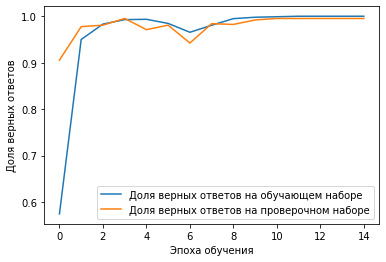

In [38]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

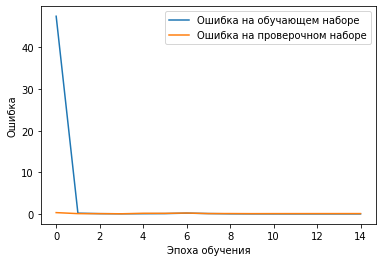

In [39]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [40]:
model.save("Symbol_Check_model_s16_32.h5")

# добавим еще один сверточный слой

In [41]:
# Создаем последовательную модель
model_s16_32_64 = Sequential()
# Сверточный слой
model_s16_32_64.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32_64.add(Flatten())
model_s16_32_64.add(Dense(512, activation='relu'))
# Выходной слой, 208 нейронов по количеству классов
model_s16_32_64.add(Dense(208, activation='softmax'))
model_s16_32_64.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [42]:
model_s16_32_64.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [43]:
history = model_s16_32_64.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 106s - loss: 9.8294 - accuracy: 0.5932 - val_loss: 0.1865 - val_accuracy: 0.9375 - 106s/epoch - 566ms/step
Epoch 2/15
188/188 - 95s - loss: 0.1390 - accuracy: 0.9589 - val_loss: 0.0280 - val_accuracy: 0.9936 - 95s/epoch - 508ms/step
Epoch 3/15
188/188 - 106s - loss: 0.0452 - accuracy: 0.9897 - val_loss: 0.0755 - val_accuracy: 0.9792 - 106s/epoch - 563ms/step
Epoch 4/15
188/188 - 108s - loss: 0.0491 - accuracy: 0.9925 - val_loss: 0.0324 - val_accuracy: 0.9936 - 108s/epoch - 575ms/step
Epoch 5/15
188/188 - 100s - loss: 0.0762 - accuracy: 0.9875 - val_loss: 0.0304 - val_accuracy: 0.9920 - 100s/epoch - 532ms/step
Epoch 6/15
188/188 - 94s - loss: 0.0298 - accuracy: 0.9947 - val_loss: 0.0216 - val_accuracy: 0.9904 - 94s/epoch - 498ms/step
Epoch 7/15
188/188 - 101s - loss: 0.0836 - accuracy: 0.9879 - val_loss: 0.3036 - val_accuracy: 0.9712 - 101s/epoch - 539ms/step
Epoch 8/15
188/188 - 96s - loss: 0.0867 - accuracy: 0.9824 - val_loss: 0.0575 - val_accuracy: 0.9760 - 96s/e

In [44]:
scores = model_s16_32_64.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 3s 133ms/step - loss: 2.3896e-04 - accuracy: 1.0000


In [45]:
model_s16_32_64.save("Symbol_Check_model_s16_32_64.h5")

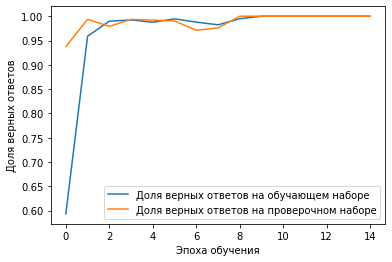

In [46]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

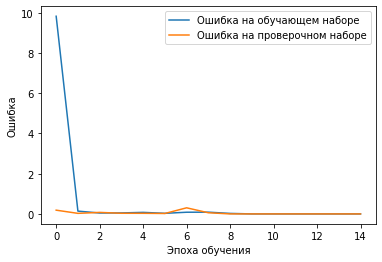

In [47]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# Добавляем слой Dropout 

In [48]:
# Создаем последовательную модель
model_s16_32_64_drop = Sequential()
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_s16_32_64_drop.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_s16_32_64_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_s16_32_64_drop.add(Flatten())
model_s16_32_64_drop.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
# Выходной слой, 208 нейронов по количеству классов
model_s16_32_64_drop.add(Dense(208, activation='softmax'))
model_s16_32_64_drop.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)      

In [49]:
model_s16_32_64_drop.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [50]:
history = model_s16_32_64_drop.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 86s - loss: 6.0807 - accuracy: 0.6711 - val_loss: 0.3414 - val_accuracy: 0.8974 - 86s/epoch - 459ms/step
Epoch 2/15
188/188 - 85s - loss: 0.1060 - accuracy: 0.9676 - val_loss: 0.0764 - val_accuracy: 0.9808 - 85s/epoch - 454ms/step
Epoch 3/15
188/188 - 84s - loss: 0.0463 - accuracy: 0.9900 - val_loss: 0.0887 - val_accuracy: 0.9744 - 84s/epoch - 447ms/step
Epoch 4/15
188/188 - 84s - loss: 0.0228 - accuracy: 0.9959 - val_loss: 0.0334 - val_accuracy: 0.9952 - 84s/epoch - 446ms/step
Epoch 5/15
188/188 - 84s - loss: 0.0323 - accuracy: 0.9945 - val_loss: 0.0157 - val_accuracy: 0.9952 - 84s/epoch - 445ms/step
Epoch 6/15
188/188 - 81s - loss: 0.1130 - accuracy: 0.9778 - val_loss: 0.0238 - val_accuracy: 0.9888 - 81s/epoch - 432ms/step
Epoch 7/15
188/188 - 81s - loss: 0.1046 - accuracy: 0.9786 - val_loss: 0.0246 - val_accuracy: 0.9920 - 81s/epoch - 432ms/step
Epoch 8/15
188/188 - 81s - loss: 0.0323 - accuracy: 0.9957 - val_loss: 0.0466 - val_accuracy: 0.9904 - 81s/epoch - 433

In [51]:
model_s16_32_64_drop.save("Symbol_Check_model_s16_32_64_drop.h5")

In [52]:
scores = model_s16_32_64_drop.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 3s 136ms/step - loss: 0.0022 - accuracy: 0.9984


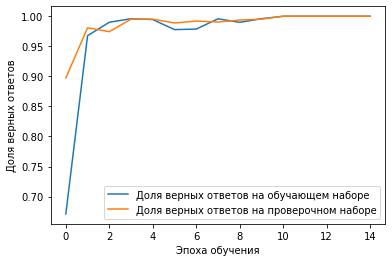

In [53]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

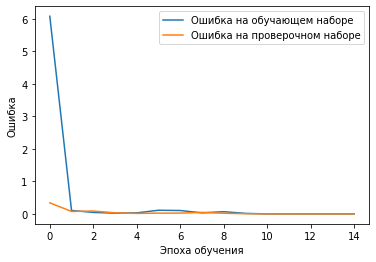

In [54]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# Изменим размеры фильтров на сверточных слоях

In [55]:
# Создаем последовательную модель
model_f7_5_3_drop = Sequential()
# Сверточный слой
model_f7_5_3_drop.add(Conv2D(16, (7, 7), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f7_5_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_f7_5_3_drop.add(Conv2D(32, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f7_5_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_f7_5_3_drop.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f7_5_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_f7_5_3_drop.add(Flatten())
model_f7_5_3_drop.add(Dense(512, activation='relu'))
model_f7_5_3_drop.add(Dropout(0.1))
# Выходной слой, 208 нейронов по количеству классов
model_f7_5_3_drop.add(Dense(208, activation='softmax'))
model_f7_5_3_drop.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 16)      800       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)      

In [56]:
model_f7_5_3_drop.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [57]:
history = model_f7_5_3_drop.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 132s - loss: 10.7084 - accuracy: 0.5044 - val_loss: 0.3212 - val_accuracy: 0.8926 - 132s/epoch - 704ms/step
Epoch 2/15
188/188 - 133s - loss: 0.1944 - accuracy: 0.9425 - val_loss: 0.0852 - val_accuracy: 0.9744 - 133s/epoch - 707ms/step
Epoch 3/15
188/188 - 142s - loss: 0.0305 - accuracy: 0.9927 - val_loss: 0.0323 - val_accuracy: 0.9920 - 142s/epoch - 758ms/step
Epoch 4/15
188/188 - 144s - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0101 - val_accuracy: 0.9952 - 144s/epoch - 767ms/step
Epoch 5/15
188/188 - 151s - loss: 0.0123 - accuracy: 0.9980 - val_loss: 0.0024 - val_accuracy: 1.0000 - 151s/epoch - 803ms/step
Epoch 6/15
188/188 - 136s - loss: 0.0271 - accuracy: 0.9954 - val_loss: 0.1525 - val_accuracy: 0.9647 - 136s/epoch - 724ms/step
Epoch 7/15
188/188 - 140s - loss: 0.1832 - accuracy: 0.9628 - val_loss: 0.0509 - val_accuracy: 0.9824 - 140s/epoch - 743ms/step
Epoch 8/15
188/188 - 137s - loss: 0.0790 - accuracy: 0.9852 - val_loss: 0.0030 - val_accuracy: 1.0000 -

In [58]:
model_f7_5_3_drop.save("Symbol_Check_model_f7_5_3_drop.h5")

In [59]:
scores = model_f7_5_3_drop.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 4s 190ms/step - loss: 3.1123e-05 - accuracy: 1.0000


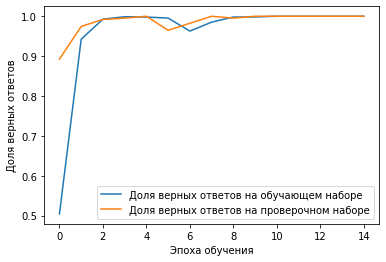

In [60]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

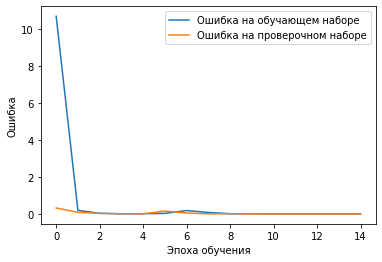

In [61]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [62]:
# Создаем последовательную модель
model_f11_7_3_drop = Sequential()
# Сверточный слой
model_f11_7_3_drop.add(Conv2D(16, (11, 11), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f11_7_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_f11_7_3_drop.add(Conv2D(32, (7, 7), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f11_7_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model_f11_7_3_drop.add(Conv2D(64, (3, 3), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model_f11_7_3_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model_f11_7_3_drop.add(Flatten())
model_f11_7_3_drop.add(Dense(512, activation='relu'))
model_f11_7_3_drop.add(Dropout(0.1))
# Выходной слой, 208 нейронов по количеству классов
model_f11_7_3_drop.add(Dense(208, activation='softmax'))
model_f11_7_3_drop.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 128, 128, 16)      4112      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        32800     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 64)      

In [63]:
model_f11_7_3_drop.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [64]:
history = model_f11_7_3_drop.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=2)

Epoch 1/15
188/188 - 328s - loss: 4.7921 - accuracy: 0.2981 - val_loss: 0.9441 - val_accuracy: 0.6587 - 328s/epoch - 2s/step
Epoch 2/15
188/188 - 322s - loss: 0.5243 - accuracy: 0.8272 - val_loss: 0.3056 - val_accuracy: 0.9006 - 322s/epoch - 2s/step
Epoch 3/15
188/188 - 316s - loss: 0.2165 - accuracy: 0.9269 - val_loss: 0.1378 - val_accuracy: 0.9567 - 316s/epoch - 2s/step
Epoch 4/15
188/188 - 316s - loss: 0.1323 - accuracy: 0.9546 - val_loss: 0.0640 - val_accuracy: 0.9808 - 316s/epoch - 2s/step
Epoch 5/15
188/188 - 315s - loss: 0.0961 - accuracy: 0.9715 - val_loss: 0.0562 - val_accuracy: 0.9792 - 315s/epoch - 2s/step
Epoch 6/15
188/188 - 316s - loss: 0.0672 - accuracy: 0.9834 - val_loss: 0.2542 - val_accuracy: 0.9583 - 316s/epoch - 2s/step
Epoch 7/15
188/188 - 316s - loss: 0.1475 - accuracy: 0.9674 - val_loss: 0.1760 - val_accuracy: 0.9455 - 316s/epoch - 2s/step
Epoch 8/15
188/188 - 316s - loss: 0.0823 - accuracy: 0.9804 - val_loss: 0.0704 - val_accuracy: 0.9824 - 316s/epoch - 2s/step


In [65]:
model_f11_7_3_drop.save("Symbol_Check_model_f11_7_3_drop.h5")

In [66]:
scores = model_f11_7_3_drop.evaluate(test_dataset, verbose=1)

21/21 [==============================] - 10s 490ms/step - loss: 0.0394 - accuracy: 0.9888


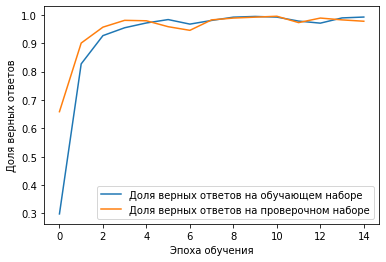

In [67]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

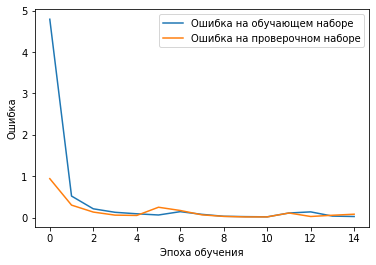

In [68]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()